# Part A 
- Summmary statistics- categorical and numerical
- Cluster
- Correlation

In [96]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt

df = pd.read_excel (r"C:\Users\micha\OneDrive - UTS\YEAR 3\Data\24632123.xlsx")
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,passed days,previous,poutcome,variation rate,price index,Confidence Index,euribor3m,No. employed,Term Deposit,State
0,31,technician,married,professional.course,unknown,yes,no,Fax,4,3,...,999,0,nonexistent,1.4,93.444,-36.1,4.965,5017.5,0,ACT
1,57,management,married,university.degree,no,yes,no,Mailing,6,2,...,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5008.7,0,NSW
2,40,management,married,university.degree,no,yes,no,Fax,3,5,...,9,1,success,-1.7,94.215,-40.3,0.896,5191,1,ACT
3,26,blue-collar,single,high.school,no,yes,no,Fax,6,5,...,3,1,success,-3.4,92.649,-30.1,0.714,5176.3,1,NSW
4,30,blue-collar,single,high.school,no,yes,no,Mailing,3,4,...,999,0,nonexistent,1.4,93.918,-42.7,4.968,?,0,ACT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2631,36,admin.,married,university.degree,no,yes,yes,Email,1,3,...,999,0,nonexistent,1.1,93.994,-36.4,4.858,5023.5,0,TAS
2632,30,technician,single,university.degree,unknown,no,no,Cellphone,1,2,...,999,0,nonexistent,1.1,93.994,-36.4,4.856,5023.5,0,NSW
2633,43,admin.,married,university.degree,no,yes,yes,Telephone,3,2,...,999,0,nonexistent,1.4,93.918,-42.7,4.962,5176.3,0,TAS
2634,35,admin.,married,high.school,no,yes,yes,Fax,1,1,...,999,0,nonexistent,-1.8,92.893,-46.2,1.354,5076.2,0,TAS


In [97]:
df.describe()

,age,month,day_of_week,duration,campaign,passed days,previous,variation rate,price index,Confidence Index,euribor3m,Term Deposit
count,2636.000000,2636.000000,2636.000000,2636.000000,2636.000000,2636.000000,2636.000000,2636.000000,2636.000000,2636.000000,2636.000000,2636.000000
mean,40.045524,3.234446,2.997724,263.944992,2.524659,962.830046,0.159332,0.091844,93.582563,-40.518361,3.652480,0.113050
std,10.201323,2.394896,1.401542,271.668325,2.596845,186.086234,0.463908,1.567361,0.577132,4.578708,1.955514,0.316714
min,18.000000,1.000000,1.000000,5.000000,1.000000,2.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,0.000000
25%,32.000000,1.000000,2.000000,101.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,0.000000
50%,38.000000,3.000000,3.000000,179.000000,2.000000,999.000000,0.000000,1.100000,93.918000,-41.800000,4.857000,0.000000
75%,47.000000,4.000000,4.000000,323.250000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,0.000000
max,95.000000,10.000000,5.000000,3076.000000,33.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,50.450000,1.000000


# 1.2 Initial data exploration
### 1.2.1 Missing values

In [98]:
# check for missing values or specific unknown entries ('unknown' or '?') in each attribute
for column in df.columns:
    # count occurrences of 'unknown', '?'
    missing_count = df[column].isin(['unknown', '?']).sum()
    
    if missing_count > 0:
        print(f"{column} : {missing_count} ")


job : 28 
marital : 6 
education : 118 
default : 584 
housing : 76 
loan : 76 
No. employed : 192 


### Categorical attributes

### Job

In [99]:
job_frequency = df['job'].value_counts()
print(job_frequency)

job
admin.           645
blue-collar      585
technician       457
services         249
management       205
retired          105
self-employed    100
entrepreneur      92
housemaid         76
unemployed        54
student           40
unknown           28
Name: count, dtype: int64


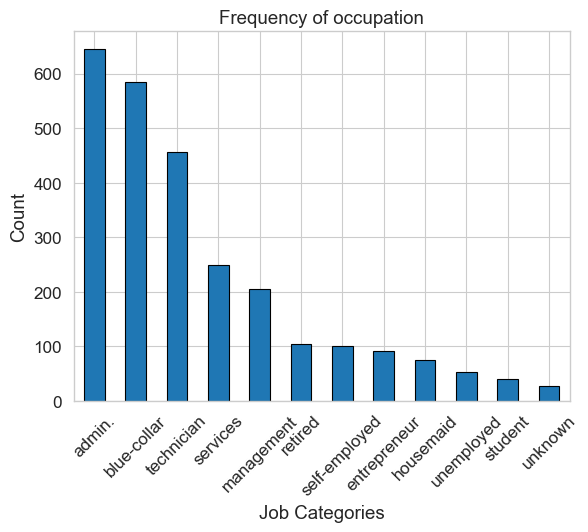

2636

In [100]:
# bar chart
job_frequency.plot(kind='bar', edgecolor='black')
plt.title("Frequency of occupation")
plt.xlabel("Job Categories")
plt.ylabel("Count")
plt.xticks(rotation=45)  
plt.show()

job_frequency.sum()

### Marital

In [101]:
marital = df['marital'].value_counts()
print(marital)
print(marital.sum())

marital
married     1611
single       737
divorced     282
unknown        6
Name: count, dtype: int64
2636


In [102]:
marital = df['marital'].value_counts()
marital_proportions = (marital / marital.sum()) * 100
print(marital_proportions)

marital
married     61.115326
single      27.959029
divorced    10.698027
unknown      0.227618
Name: count, dtype: float64


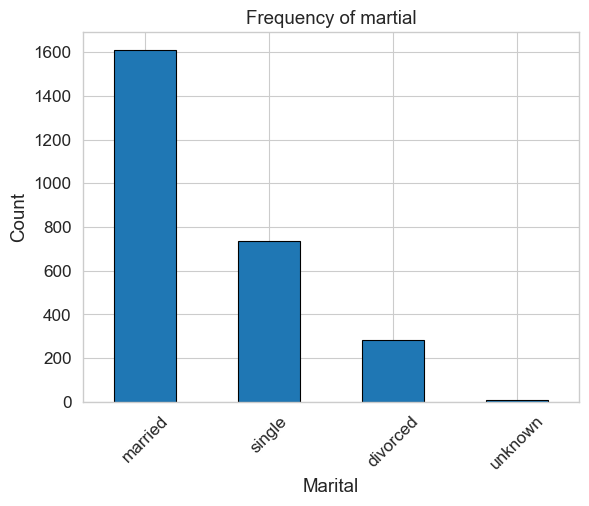

In [103]:
marital.plot(kind='bar', edgecolor='black')
plt.title("Frequency of martial")
plt.xlabel("Marital")
plt.ylabel("Count")
plt.xticks(rotation=45)  
plt.show()

### Education

In [104]:
edu = df['education'].value_counts()
print(edu)

education
university.degree      799
high.school            591
basic.9y               378
professional.course    326
basic.4y               261
basic.6y               162
unknown                118
illiterate               1
Name: count, dtype: int64


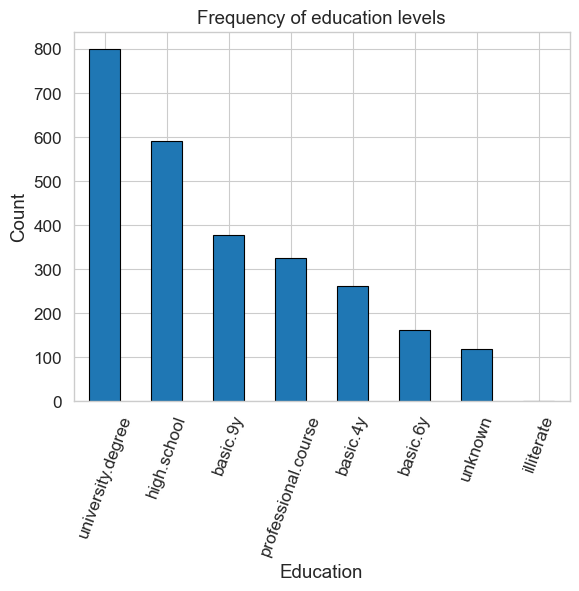

2636

In [105]:
edu.plot(kind='bar', edgecolor='black')
plt.title("Frequency of education levels")
plt.xlabel("Education")
plt.ylabel("Count")
plt.xticks(rotation=70)  
plt.show()

edu.sum()

### Default

default
no         2052
unknown     584
Name: count, dtype: int64
2636


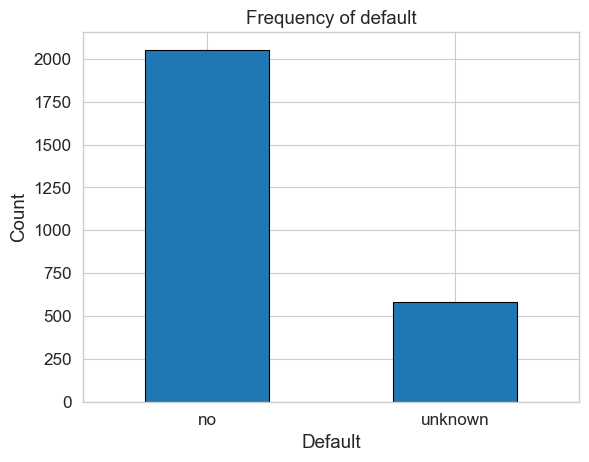

In [106]:
default = df['default'].value_counts()
print(default)
print(default.sum())

default.plot(kind='bar', edgecolor='black')
plt.title("Frequency of default")
plt.xlabel("Default")
plt.ylabel("Count")
plt.xticks(rotation=0)  
plt.show()

### Housing

housing
yes        1348
no         1212
unknown      76
Name: count, dtype: int64


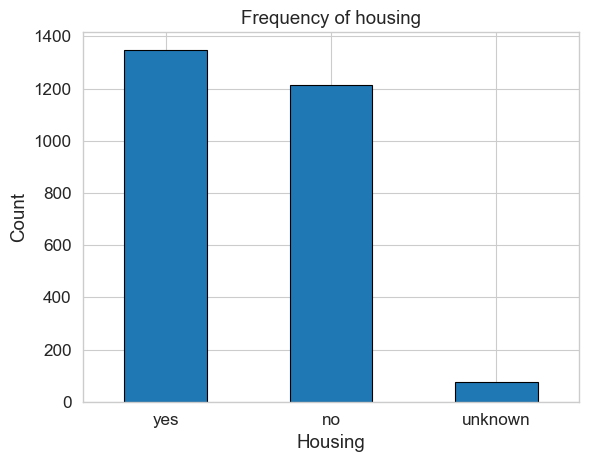

In [107]:
housing = df['housing'].value_counts()
print(housing)
housing.plot(kind='bar', edgecolor='black')
plt.title("Frequency of housing")
plt.xlabel("Housing")
plt.ylabel("Count")
plt.xticks(rotation=0)  
plt.show()

array([<Axes: ylabel='count'>], dtype=object)

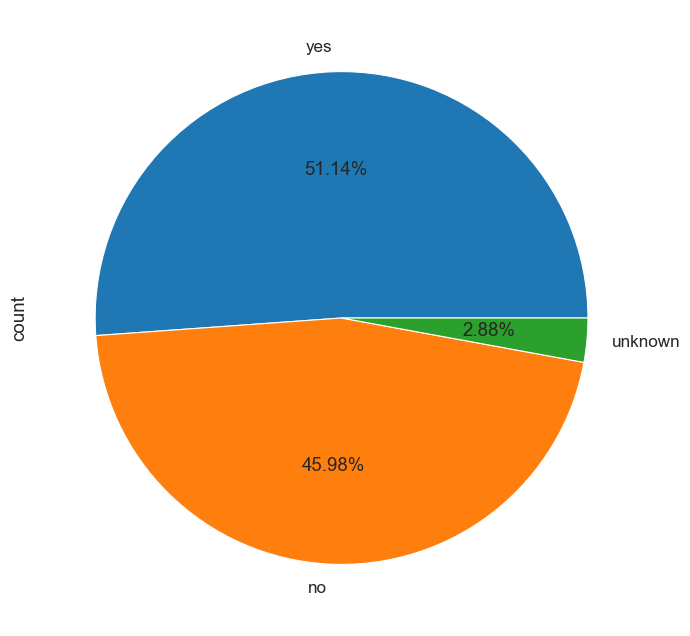

In [108]:
df['housing'].value_counts().plot(kind='pie', subplots=True, figsize=(16, 8), autopct='%1.2f%%', legend=False)

array([<Axes: ylabel='count'>], dtype=object)

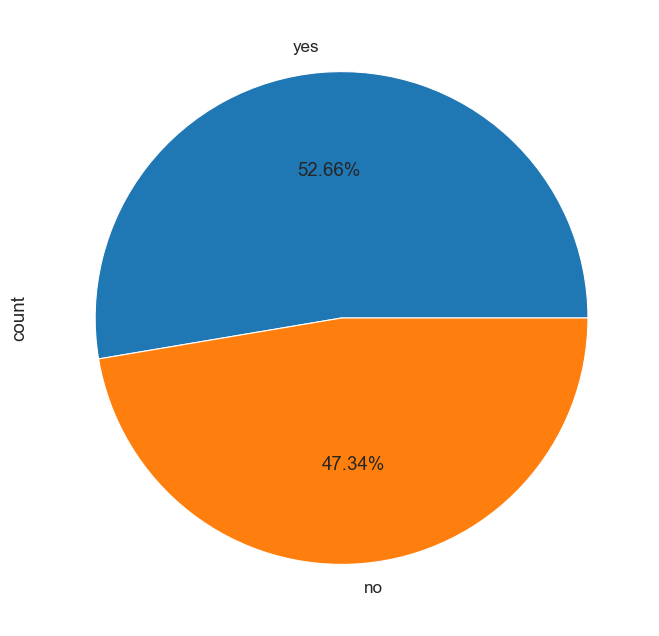

In [109]:
hosuing = df['housing'].value_counts()
housing_subdata = df[~df['housing'].isin(['unknown'])]
housing_subdata['housing'].value_counts().plot(kind='pie', subplots=True, figsize=(16, 8), autopct='%1.2f%%', legend=False)

### Loan

loan
no         2174
yes         386
unknown      76
Name: count, dtype: int64
2636


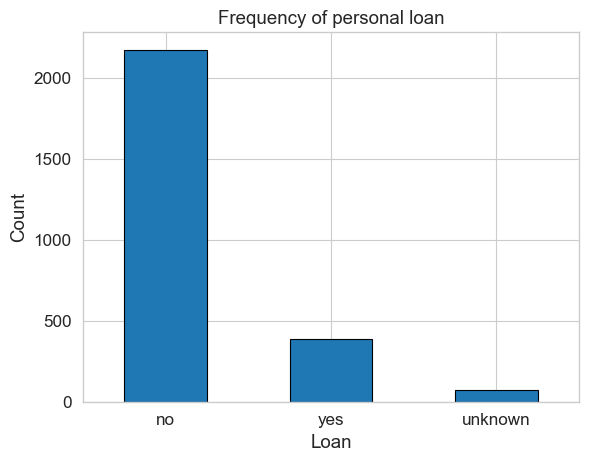

In [110]:
loan = df['loan'].value_counts()
print(loan)
print(loan.sum())

loan.plot(kind='bar', edgecolor='black')
plt.title("Frequency of personal loan")
plt.xlabel("Loan")
plt.ylabel("Count")
plt.xticks(rotation=0)  
plt.show()

array([<Axes: ylabel='count'>], dtype=object)

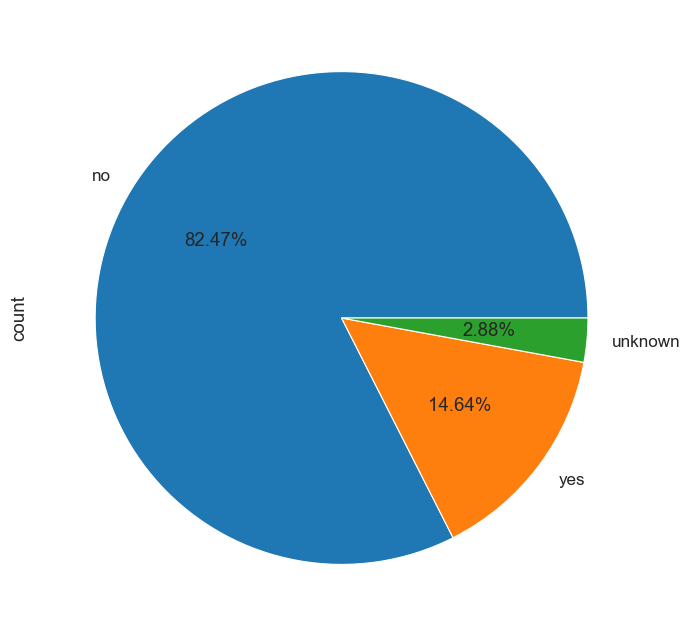

In [111]:
df['loan'].value_counts().plot(kind='pie', subplots=True, figsize=(16, 8), autopct='%1.2f%%', legend=False)

array([<Axes: ylabel='count'>], dtype=object)

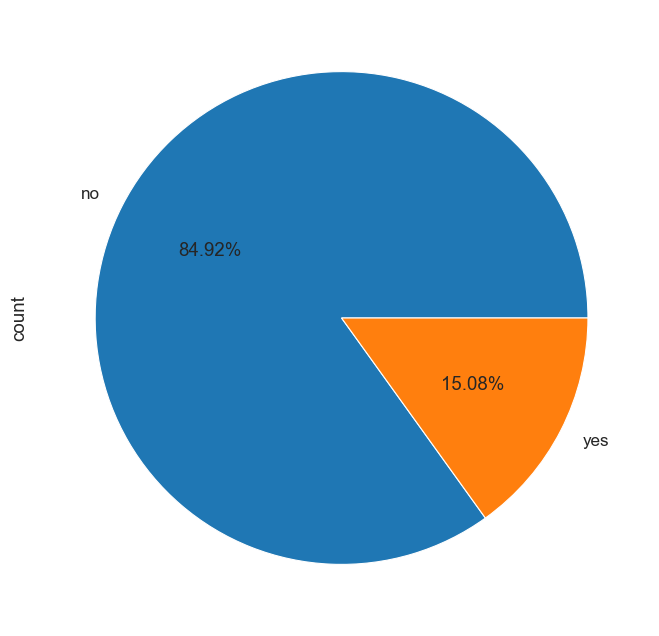

In [112]:
loan = df['loan'].value_counts()
loan_subdata = df[~df['loan'].isin(['unknown'])]
loan_subdata['loan'].value_counts().plot(kind='pie', subplots=True, figsize=(16, 8), autopct='%1.2f%%', legend=False)

### Contact

2636


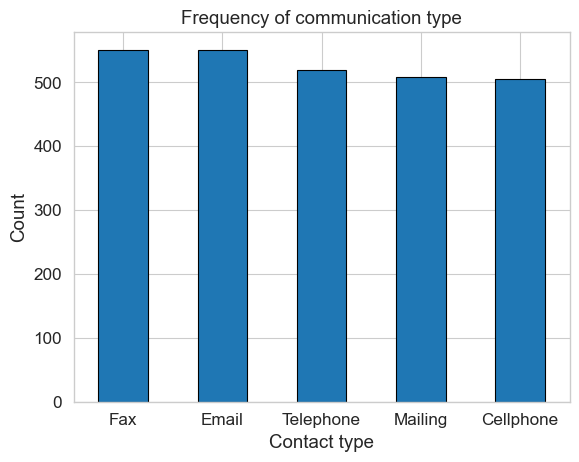

contact
Fax          551
Email        551
Telephone    520
Mailing      509
Cellphone    505
Name: count, dtype: int64
2636


In [113]:
contact = df['contact'].value_counts()
print(contact.sum())

contact.plot(kind='bar', edgecolor='black')
plt.title("Frequency of communication type")
plt.xlabel("Contact type")
plt.ylabel("Count")
plt.xticks(rotation=0)  
plt.show()

contact = df['contact'].value_counts()
print(contact)
print(contact.sum())

### Month

month
1     867
3     492
4     366
2     348
6     272
9     162
5      47
8      34
10     30
7      18
Name: count, dtype: int64
2636


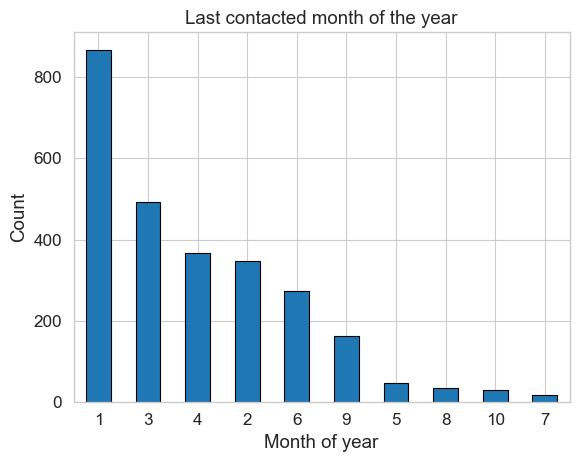

In [114]:
month = df['month'].value_counts()
print(month)
print(month.sum())

month.plot(kind='bar', edgecolor='black')
plt.title("Last contacted month of the year")
plt.xlabel("Month of year")
plt.ylabel("Count")
plt.xticks(rotation=0)  
plt.show()

### Day of week

day_of_week
4    575
3    556
1    543
5    489
2    473
Name: count, dtype: int64


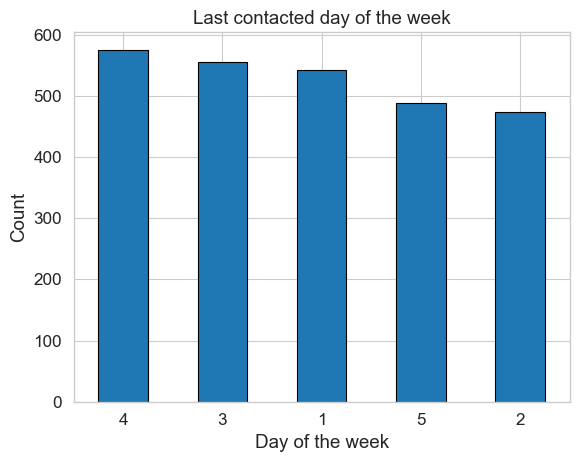

In [115]:
day = df['day_of_week'].value_counts()
print(day)
day.plot(kind='bar', edgecolor='black')
plt.title("Last contacted day of the week")
plt.xlabel("Day of the week")
plt.ylabel("Count")
plt.xticks(rotation=0)  
plt.show()

### Poutcome

poutcome
nonexistent    2289
failure         261
success          86
Name: count, dtype: int64


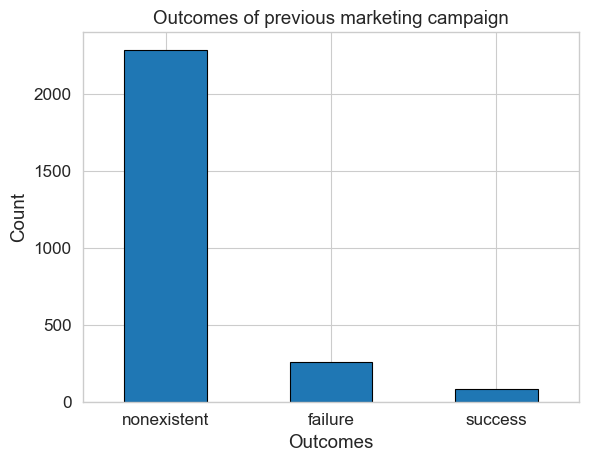

In [116]:
poutcome = df['poutcome'].value_counts()
print(poutcome)
poutcome.plot(kind='bar', edgecolor='black')
plt.title("Outcomes of previous marketing campaign")
plt.xlabel("Outcomes")
plt.ylabel("Count")
plt.xticks(rotation=0)  
plt.show()

array([<Axes: ylabel='count'>], dtype=object)

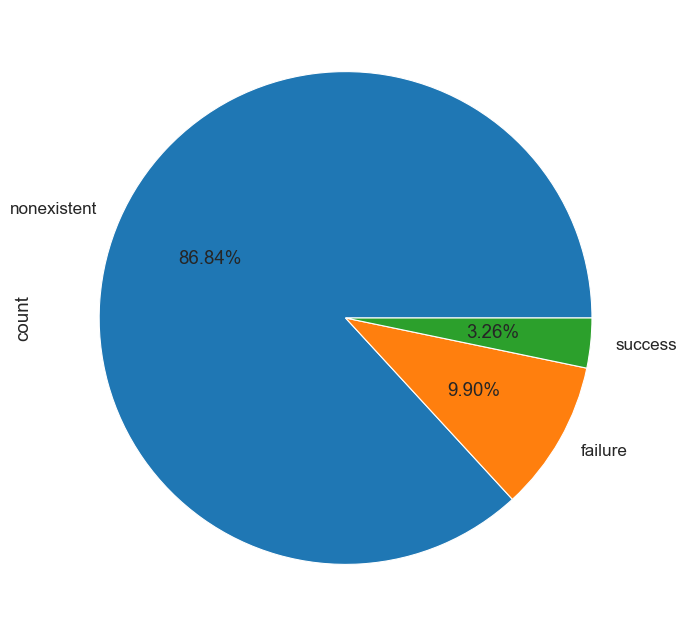

In [117]:
poutcome = df['poutcome'].value_counts()
poutcome.plot(kind='pie', subplots=True, figsize=(16,8), autopct='%1.2f%%')

array([<Axes: ylabel='count'>], dtype=object)

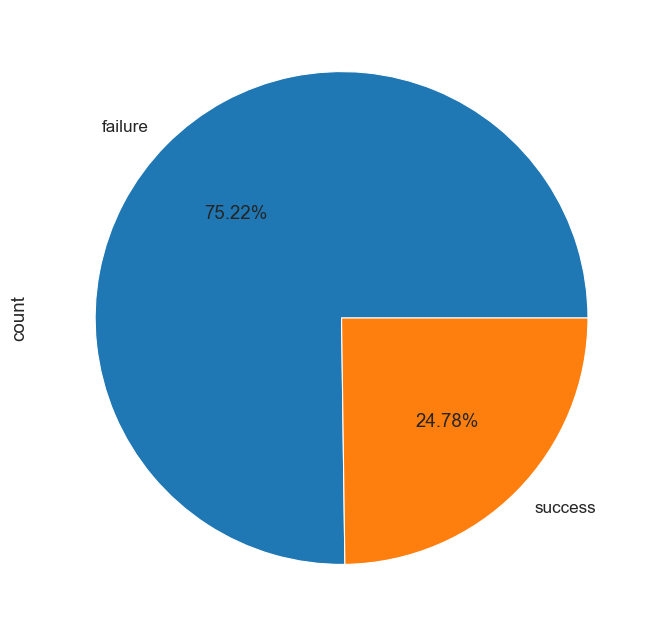

In [118]:
poutcome = df['poutcome'].value_counts()
# drop rows with 'nonexistent'
poutcome_subdata = df[~df['poutcome'].isin(['nonexistent'])]
# use filtered data
poutcome_subdata['poutcome'].value_counts().plot(kind='pie', subplots=True, figsize=(16, 8), autopct='%1.2f%%', legend=False)

### Term deposit

Term Deposit
0    2338
1     298
Name: count, dtype: int64


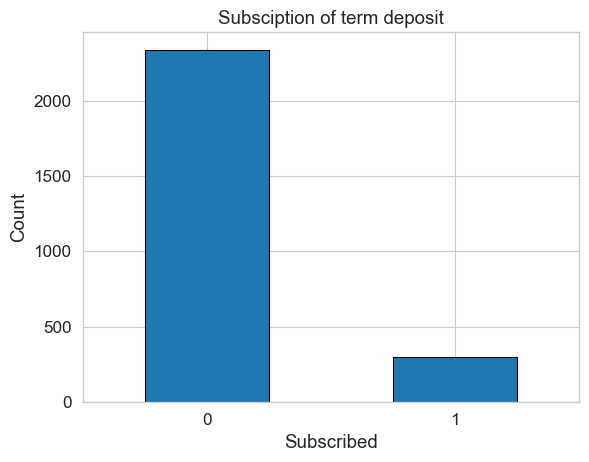

In [119]:
term_deposit = df['Term Deposit'].value_counts()
print(term_deposit)
term_deposit.plot(kind='bar', edgecolor='black')
plt.title("Subsciption of term deposit")
plt.xlabel("Subscribed")
plt.ylabel("Count")
plt.xticks(rotation=0)  
plt.show()

### State

State
SA     356
VIC    341
NT     334
ACT    330
NSW    326
TAS    326
QLD    322
WA     301
Name: count, dtype: int64
2636


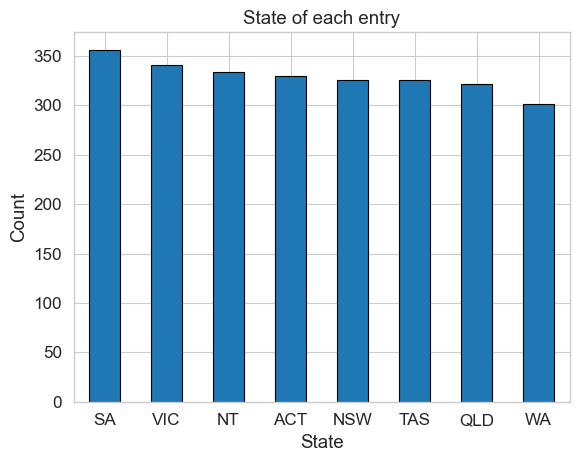

In [120]:
state = df['State'].value_counts()
print(state)
print(state.sum())

state.plot(kind='bar', edgecolor='black')
plt.title("State of each entry")
plt.xlabel("State")
plt.ylabel("Count")
plt.xticks(rotation=0)  
plt.show()

### 1.2.3 Numerical attributes

### Age

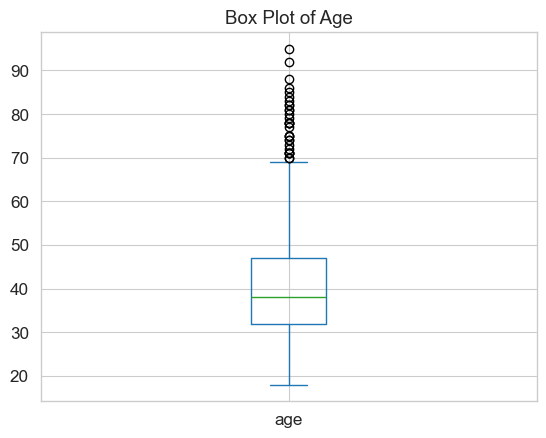

Mean: 40.04552352048558
Median (Q2): 38.0
Mode: 31
Variance: 104.06699703132459
Standard deviation: 10.201323298049356
Q1 (25th percentile): 32.0
Q2 (Median): 38.0
Q3 (75th percentile): 47.0
Interquartile Range (IQR): 15.0
Maximum: 69.5
Minimum: 9.5
2636


In [121]:
df['age'].plot(kind='box')
plt.title("Box Plot of Age")
plt.show()

# mean, median, mode
mean_age = df['age'].mean()
median_age = df['age'].median()
mode_age = df['age'].mode()[0] 

# variance
var_age = df['age'].var()
std_dev_age = df['age'].std()


# Q1, Q3, Interquartile range
q1_age = df['age'].quantile(0.25) 
q3_age = df['age'].quantile(0.75) 
iqr_age = q3_age - q1_age 
maximum_age = q3_age + 1.5 * iqr_age
minimum_age = q1_age - 1.5 * iqr_age

print(f"Mean: {mean_age}")
print(f"Median (Q2): {median_age}")
print(f"Mode: {mode_age}")

print(f"Variance: {var_age}")
print(f"Standard deviation: {std_dev_age}")


print(f"Q1 (25th percentile): {q1_age}")
print(f"Q2 (Median): {median_age}")
print(f"Q3 (75th percentile): {q3_age}")
print(f"Interquartile Range (IQR): {iqr_age}")
print(f"Maximum: {maximum_age}")
print(f"Minimum: {minimum_age}")

print(df['age'].count())

### Duration

Mean: 263.94499241274656
Median (Q2): 179.0
Mode: 96
Variance: 73803.6785669449
Standard deviation: 271.66832455578054
Q1 (25th percentile): 101.0
Q2 (Median): 179.0
Q3 (75th percentile): 323.25
Interquartile Range (IQR): 222.25
Maximum: 656.625
Minimum: -232.375
2636


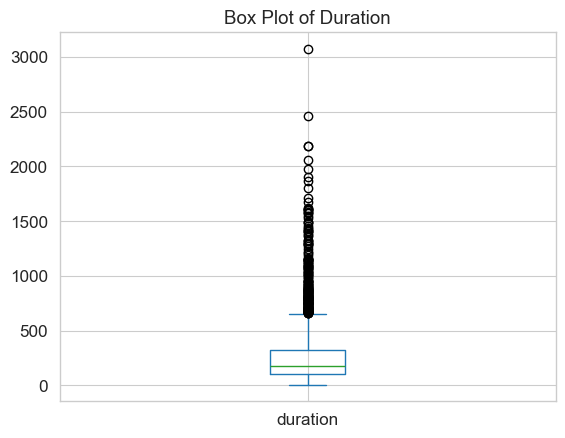

In [122]:
# mean, median, mode
mean_dur = df['duration'].mean()
median_dur = df['duration'].median()
mode_dur = df['duration'].mode()[0] 

# variance
var_dur = df['duration'].var()
std_dev_dur = df['duration'].std()


# Q1, Q3, Interquartile range
q1_dur = df['duration'].quantile(0.25) 
q3_dur = df['duration'].quantile(0.75) 
iqr_dur = q3_dur - q1_dur 
maximum_dur = q3_dur + 1.5 * iqr_dur
minimum_dur = q1_dur - 1.5 * iqr_dur

print(f"Mean: {mean_dur}")
print(f"Median (Q2): {median_dur}")
print(f"Mode: {mode_dur}")

print(f"Variance: {var_dur}")
print(f"Standard deviation: {std_dev_dur}")


print(f"Q1 (25th percentile): {q1_dur}")
print(f"Q2 (Median): {median_dur}")
print(f"Q3 (75th percentile): {q3_dur}")
print(f"Interquartile Range (IQR): {iqr_dur}")
print(f"Maximum: {maximum_dur}")
print(f"Minimum: {minimum_dur}")

print(df['age'].count())

# box plot for 'duration'
df['duration'].plot(kind='box')
plt.title("Box Plot of Duration")
plt.show()

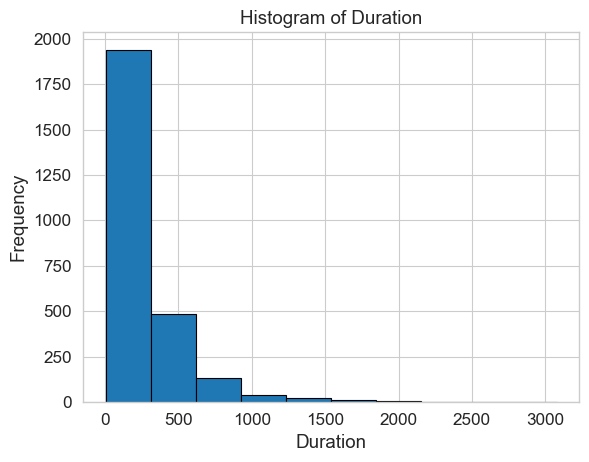

In [123]:
df['duration'].plot(kind='hist', edgecolor='black') 
plt.title("Histogram of Duration")
plt.xlabel("Duration")
plt.ylabel("Frequency")
plt.show()

### Passed days

Mean: 962.8300455235205
Median (Q2): 999.0
Mode: 999
Variance: 34628.08647453363
Standard deviation: 186.08623397375106
Q1 (25th percentile): 999.0
Q2 (Median): 999.0
Q3 (75th percentile): 999.0
Interquartile Range (IQR): 0.0
Maximum: 999.0
Minimum: 999.0
2636


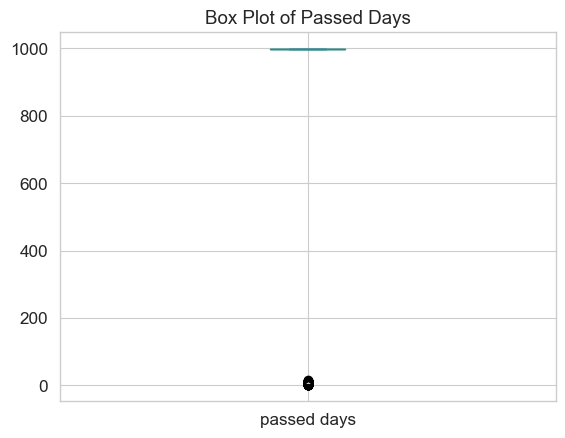

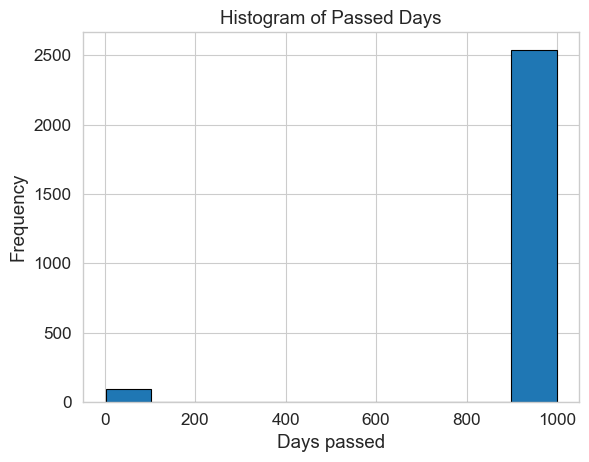

In [124]:
# mean, median, mode
mean_pd = df['passed days'].mean()
median_pd = df['passed days'].median()
mode_pd = df['passed days'].mode()[0] 

# variance
var_pd = df['passed days'].var()
std_dev_pd = df['passed days'].std()


# Q1, Q3, Interquartile range
q1_pd = df['passed days'].quantile(0.25) 
q3_pd = df['passed days'].quantile(0.75) 
iqr_pd = q3_pd - q1_pd 
maximum_pd = q3_pd + 1.5 * iqr_pd
minimum_pd = q1_pd - 1.5 * iqr_pd

print(f"Mean: {mean_pd}")
print(f"Median (Q2): {median_pd}")
print(f"Mode: {mode_pd}")

print(f"Variance: {var_pd}")
print(f"Standard deviation: {std_dev_pd}")


print(f"Q1 (25th percentile): {q1_pd}")
print(f"Q2 (Median): {median_pd}")
print(f"Q3 (75th percentile): {q3_pd}")
print(f"Interquartile Range (IQR): {iqr_pd}")
print(f"Maximum: {maximum_pd}")
print(f"Minimum: {minimum_pd}")

df['passed days'].value_counts()
print(df['passed days'].count())

# box plot for 'passed days'
df['passed days'].plot(kind='box')
plt.title("Box Plot of Passed Days")
plt.show()

df['passed days'].plot(kind='hist', edgecolor='black') 
plt.title("Histogram of Passed Days")
plt.xlabel("Days passed")
plt.ylabel("Frequency")
plt.show()

### Campaign

Mean: 2.524658573596358
Median (Q2): 2.0
Mode: 1
Variance: 6.743604247710255
Standard deviation: 2.59684505654655
Q1 (25th percentile): 1.0
Q2 (Median): 2.0
Q3 (75th percentile): 3.0
Interquartile Range (IQR): 2.0
Maximum: 6.0
Minimum: -2.0
2636


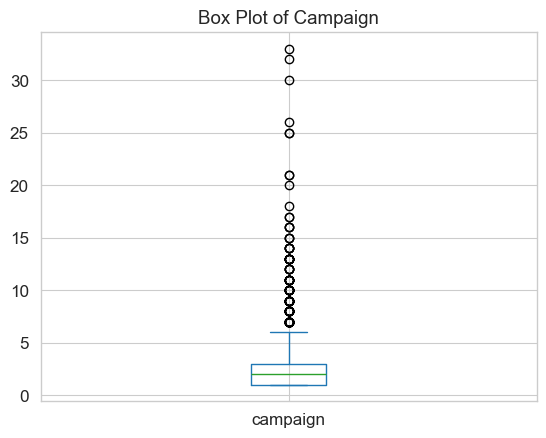

In [125]:
# mean, median, mode
mean_campaign = df['campaign'].mean()
median_campaign = df['campaign'].median()
mode_campaign = df['campaign'].mode()[0] 

# variance
var_campaign = df['campaign'].var()
std_dev_campaign = df['campaign'].std()


# Q1, Q3, Interquartile range
q1_campaign = df['campaign'].quantile(0.25) 
q3_campaign = df['campaign'].quantile(0.75) 
iqr_campaign = q3_campaign - q1_campaign
maximum_campaign = q3_campaign + 1.5 * iqr_campaign
minimum_campaign = q1_campaign - 1.5 * iqr_campaign

print(f"Mean: {mean_campaign}")
print(f"Median (Q2): {median_campaign}")
print(f"Mode: {mode_campaign}")

print(f"Variance: {var_campaign}")
print(f"Standard deviation: {std_dev_campaign}")


print(f"Q1 (25th percentile): {q1_campaign}")
print(f"Q2 (Median): {median_campaign}")
print(f"Q3 (75th percentile): {q3_campaign}")
print(f"Interquartile Range (IQR): {iqr_campaign}")
print(f"Maximum: {maximum_campaign}")
print(f"Minimum: {minimum_campaign}")

print(df['campaign'].count())

df['campaign'].plot(kind='box')
plt.title("Box Plot of Campaign")
plt.show()

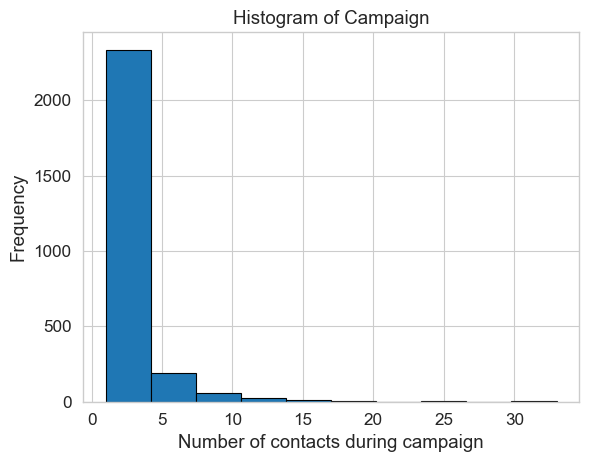

In [126]:
df['campaign'].plot(kind='hist', edgecolor='black') 
plt.title("Histogram of Campaign")
plt.xlabel("Number of contacts during campaign")
plt.ylabel("Frequency")
plt.show()

### Previous

2636


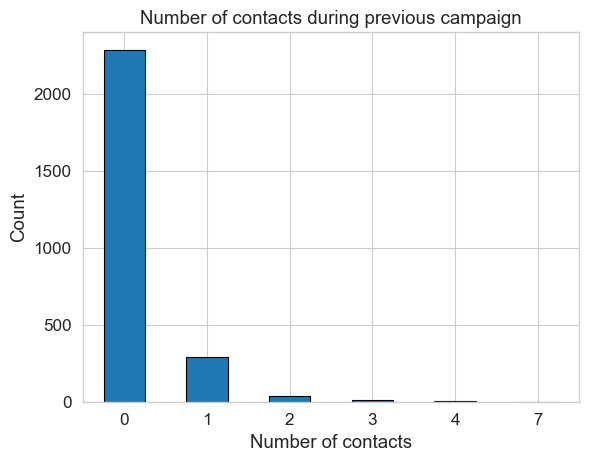

In [127]:
previous = df['previous'].value_counts()
print(df['previous'].count())

previous.plot(kind='bar', edgecolor='black')
plt.title("Number of contacts during previous campaign")
plt.xlabel("Number of contacts")
plt.ylabel("Count")
plt.xticks(rotation=0)  
plt.show()

### Variation rate

Mean: 0.09184370257966615
Median (Q2): 1.1
Mode: 1.4
Variance: 2.45662035658647
Standard deviation: 1.5673609528715682
Q1 (25th percentile): -1.8
Q2 (Median): 1.1
Q3 (75th percentile): 1.4
Interquartile Range (IQR): 3.2
Maximum: 6.200000000000001
Minimum: -6.6000000000000005


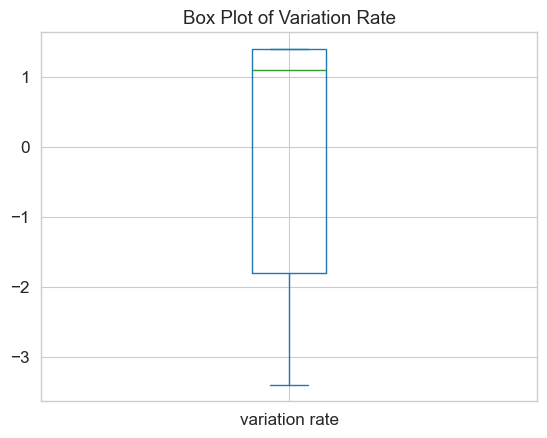

2636


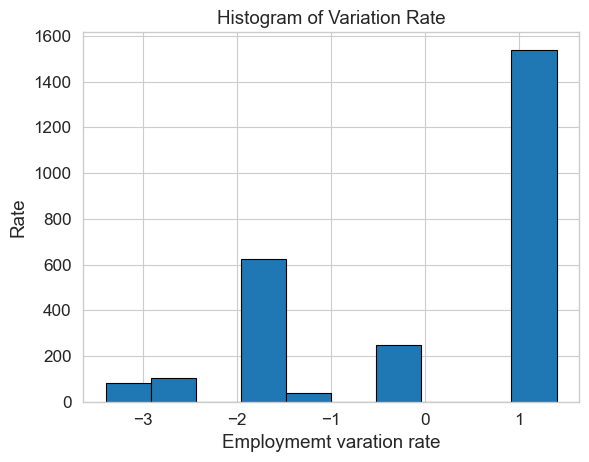

<Axes: xlabel='variation rate', ylabel='Count'>

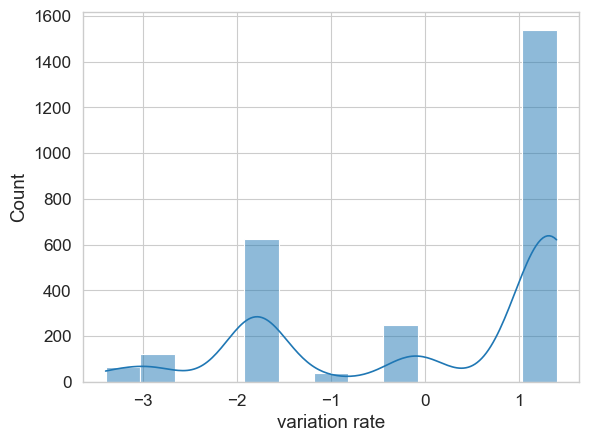

In [128]:
import seaborn as sns

# variation rate
# mean, median, mode
mean_vr = df['variation rate'].mean()
median_vr = df['variation rate'].median()
mode_vr = df['variation rate'].mode()[0] 

# variance
var_vr = df['variation rate'].var()
std_dev_vr = df['variation rate'].std()


# Q1, Q3, Interquartile range
q1_vr = df['variation rate'].quantile(0.25) 
q3_vr = df['variation rate'].quantile(0.75) 
iqr_vr = q3_vr - q1_vr
maximum_vr = q3_vr + 1.5 * iqr_vr
minimum_vr = q1_vr - 1.5 * iqr_vr

print(f"Mean: {mean_vr}")
print(f"Median (Q2): {median_vr}")
print(f"Mode: {mode_vr}")

print(f"Variance: {var_vr}")
print(f"Standard deviation: {std_dev_vr}")


print(f"Q1 (25th percentile): {q1_vr}")
print(f"Q2 (Median): {median_vr}")
print(f"Q3 (75th percentile): {q3_vr}")
print(f"Interquartile Range (IQR): {iqr_vr}")
print(f"Maximum: {maximum_vr}")
print(f"Minimum: {minimum_vr}")

df['variation rate'].plot(kind='box')
plt.title("Box Plot of Variation Rate")
plt.show()

print(df['variation rate'].count())

# Histogram
df['variation rate'].plot(kind='hist', edgecolor='black') 
plt.title("Histogram of Variation Rate")
plt.xlabel("Employmemt varation rate")
plt.ylabel("Rate")
plt.show()


# density plot
sns.histplot(df['variation rate'], kde=True)

### Price index

Mean: 93.58256259484068
Median (Q2): 93.918
Mode: 93.994
Variance: 0.3330813194200615
Standard deviation: 0.5771319774714112
Q1 (25th percentile): 93.075
Q2 (Median): 93.918
Q3 (75th percentile): 93.994
Interquartile Range (IQR): 0.9189999999999969
Maximum: 95.3725
Minimum: 91.69650000000001
2636


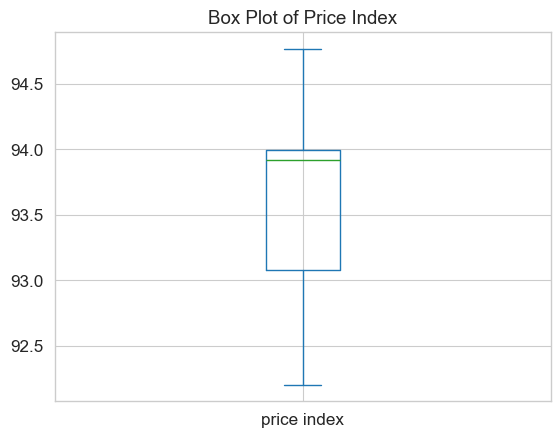

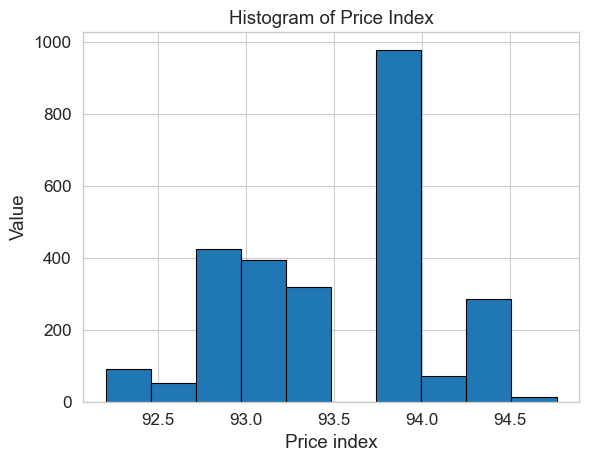

<Axes: xlabel='price index', ylabel='Count'>

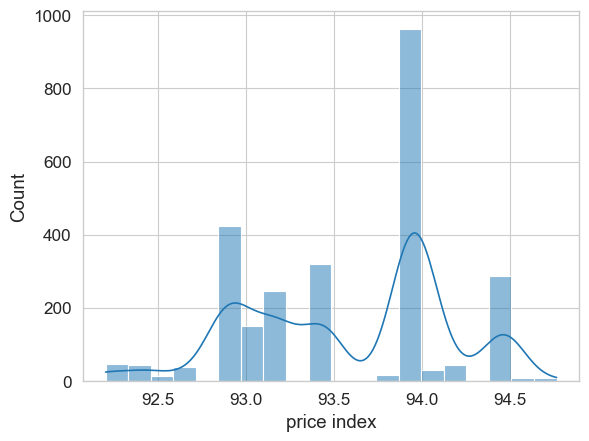

In [129]:
import seaborn as sns

# price index
# mean, median, mode
mean_pi = df['price index'].mean()
median_pi = df['price index'].median()
mode_pi = df['price index'].mode()[0] 

# variance
var_pi = df['price index'].var()
std_dev_pi = df['price index'].std()


# Q1, Q3, Interquartile range
q1_pi = df['price index'].quantile(0.25) 
q3_pi = df['price index'].quantile(0.75) 
iqr_pi = q3_pi - q1_pi
maximum_pi = q3_pi + 1.5 * iqr_pi
minimum_pi = q1_pi - 1.5 * iqr_pi

print(f"Mean: {mean_pi}")
print(f"Median (Q2): {median_pi}")
print(f"Mode: {mode_pi}")

print(f"Variance: {var_pi}")
print(f"Standard deviation: {std_dev_pi}")


print(f"Q1 (25th percentile): {q1_pi}")
print(f"Q2 (Median): {median_pi}")
print(f"Q3 (75th percentile): {q3_pi}")
print(f"Interquartile Range (IQR): {iqr_pi}")
print(f"Maximum: {maximum_pi}")
print(f"Minimum: {minimum_pi}")

print(df['price index'].count())

# box plot 
df['price index'].plot(kind='box')
plt.title("Box Plot of Price Index")
plt.show()

# histogram
df['price index'].plot(kind='hist', edgecolor='black') 
plt.title("Histogram of Price Index")
plt.xlabel("Price index")
plt.ylabel("Value")
plt.show()

# density plot
sns.histplot(df['price index'], kde=True)

### Confidence index

2636
Mean: -40.51836115326252
Median (Q2): -41.8
Mode: -36.4
Variance: 20.964565965913437
Standard deviation: 4.578707892617025
Q1 (25th percentile): -42.7
Q2 (Median): -41.8
Q3 (75th percentile): -36.4
Interquartile Range (IQR): 6.300000000000004
Maximum: -26.949999999999992
Minimum: -52.150000000000006


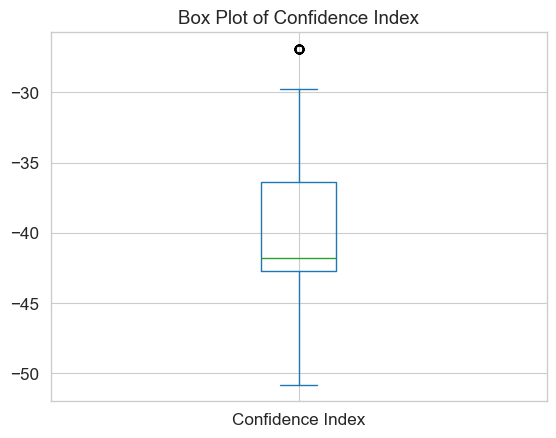

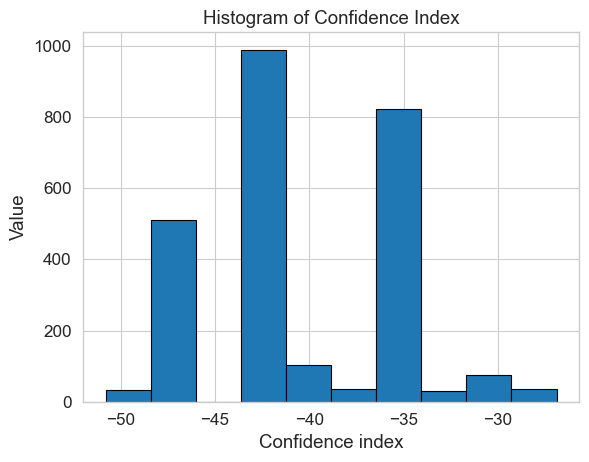

<Axes: xlabel='Confidence Index', ylabel='Count'>

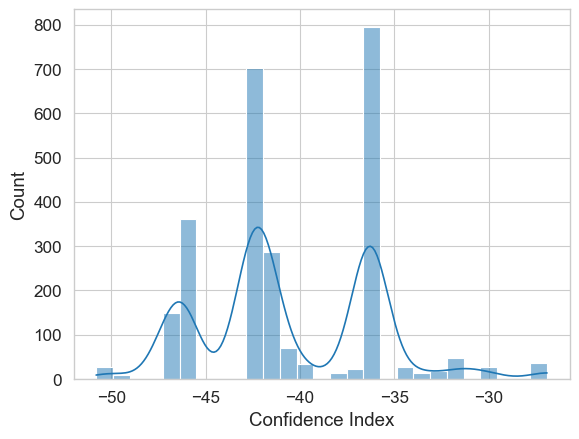

In [130]:
import seaborn as sns

print(df['Confidence Index'].count())

# mean, median, mode
mean_confidence = df['Confidence Index'].mean()
median_confidence = df['Confidence Index'].median()
mode_confidence = df['Confidence Index'].mode()[0] 

# variance
var_confidence = df['Confidence Index'].var()
std_dev_confidence= df['Confidence Index'].std()


# Q1, Q3, Interquartile range
q1_confidence = df['Confidence Index'].quantile(0.25) 
q3_confidence = df['Confidence Index'].quantile(0.75) 
iqr_confidence = q3_confidence- q1_confidence
maximum_confidence = q3_confidence + 1.5 * iqr_confidence
minimum_confidence = q1_confidence - 1.5 * iqr_confidence

print(f"Mean: {mean_confidence}")
print(f"Median (Q2): {median_confidence}")
print(f"Mode: {mode_confidence}")

print(f"Variance: {var_confidence}")
print(f"Standard deviation: {std_dev_confidence}")


print(f"Q1 (25th percentile): {q1_confidence}")
print(f"Q2 (Median): {median_confidence}")
print(f"Q3 (75th percentile): {q3_confidence}")
print(f"Interquartile Range (IQR): {iqr_confidence}")
print(f"Maximum: {maximum_confidence}")
print(f"Minimum: {minimum_confidence}")

df['Confidence Index'].plot(kind='box')
plt.title("Box Plot of Confidence Index")
plt.show()

df['Confidence Index'].plot(kind='hist', edgecolor='black') 
plt.title("Histogram of Confidence Index")
plt.xlabel("Confidence index")
plt.ylabel("Value")
plt.show()

# density plot
sns.histplot(df['Confidence Index'], kde=True)

### Euribor3m

Mean: 3.652479893778452
Median (Q2): 4.857
Mode: 4.857
Variance: 3.82403389219522
Standard deviation: 1.9555137156755562
Q1 (25th percentile): 1.344
Q2 (Median): 4.857
Q3 (75th percentile): 4.961
Interquartile Range (IQR): 3.617
Maximum: 10.3865
Minimum: -4.081499999999999
2636


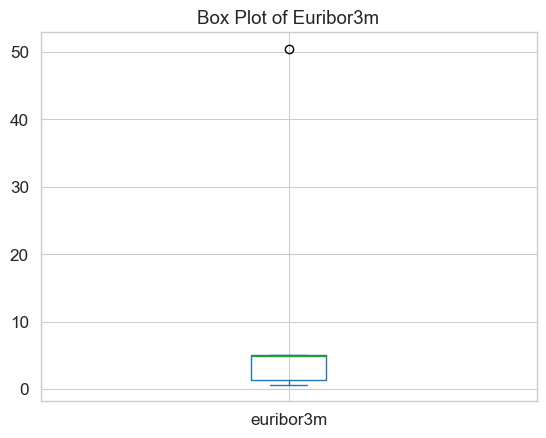

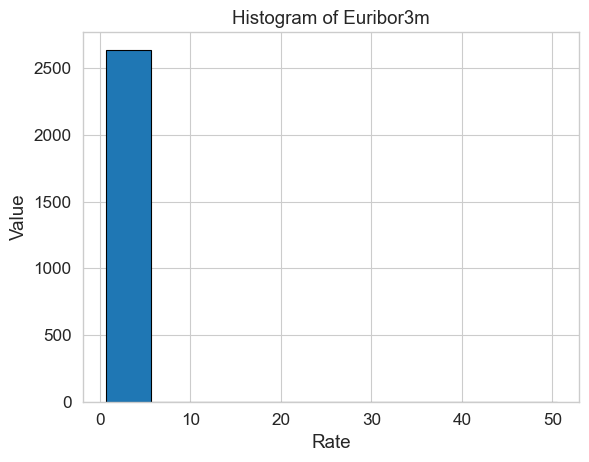

<Axes: xlabel='euribor3m', ylabel='Count'>

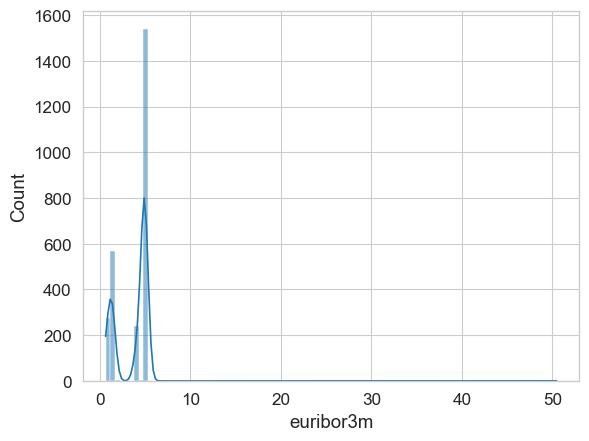

In [131]:
import seaborn as sns

# mean, median, mode
mean_euribor3m = df['euribor3m'].mean()
median_euribor3m = df['euribor3m'].median()
mode_euribor3m = df['euribor3m'].mode()[0] 

# variance
var_euribor3m = df['euribor3m'].var()
std_dev_euribor3m = df['euribor3m'].std()


# Q1, Q3, Interquartile range
q1_euribor3m = df['euribor3m'].quantile(0.25) 
q3_euribor3m = df['euribor3m'].quantile(0.75) 
iqr_euribor3m = q3_euribor3m - q1_euribor3m
maximum_euribor3m = q3_euribor3m + 1.5 * iqr_euribor3m
minimum_euribor3m = q1_euribor3m - 1.5 * iqr_euribor3m

print(f"Mean: {mean_euribor3m}")
print(f"Median (Q2): {median_euribor3m}")
print(f"Mode: {mode_euribor3m}")

print(f"Variance: {var_euribor3m}")
print(f"Standard deviation: {std_dev_euribor3m}")


print(f"Q1 (25th percentile): {q1_euribor3m}")
print(f"Q2 (Median): {median_euribor3m}")
print(f"Q3 (75th percentile): {q3_euribor3m}")
print(f"Interquartile Range (IQR): {iqr_euribor3m}")
print(f"Maximum: {maximum_euribor3m}")
print(f"Minimum: {minimum_euribor3m}")

print(df['euribor3m'].count())

df['euribor3m'].plot(kind='box')
plt.title("Box Plot of Euribor3m")
plt.show()

# histogram
df['euribor3m'].plot(kind='hist', edgecolor='black') 
plt.title("Histogram of Euribor3m")
plt.xlabel("Rate")
plt.ylabel("Value")
plt.show()

# density plot
sns.histplot(df['euribor3m'], kde=True)

### No. employed

Mean: 5089.134615384615
Median (Q2): 5076.2
Mode: 5191.0
Variance: 8137.74505588971
Standard deviation: 90.20945103418882
Q1 (25th percentile): 5008.7
Q2 (Median): 5076.2
Q3 (75th percentile): 5191.0
Interquartile Range (IQR): 182.30000000000018
Maximum: 5464.450000000001
Minimum: 4735.25
2444


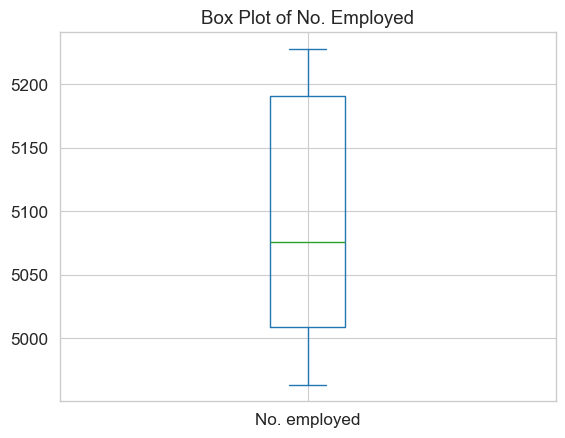

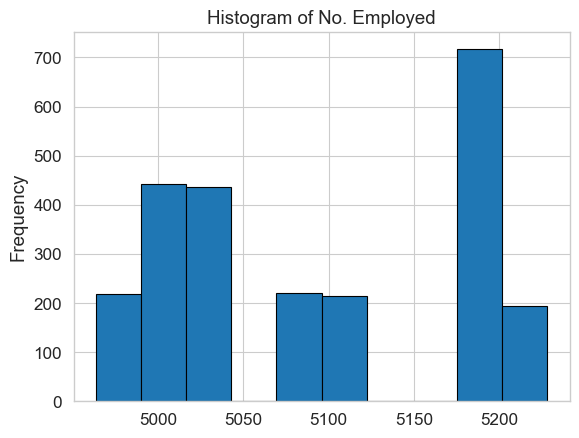

<Axes: xlabel='No. employed', ylabel='Count'>

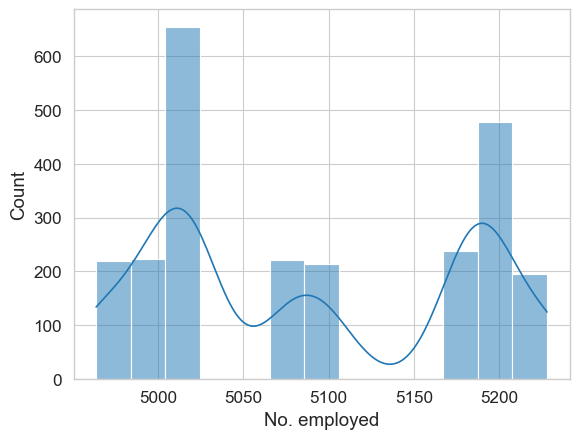

In [132]:
import seaborn as sns

df_employed = df.dropna(subset=['No. employed'])

# convert to numeric
df_employed['No. employed'] = pd.to_numeric(df['No. employed'], errors='coerce')

# drop rows with Nan values
df_employed = df_employed.dropna(subset=['No. employed'])

# No. employed
# mean, median, mode
mean_employed = df_employed['No. employed'].mean()
median_employed = df_employed['No. employed'].median()
mode_employed = df_employed['No. employed'].mode()[0] 

# variance
var_employed = df_employed['No. employed'].var()
std_dev_employed = df_employed['No. employed'].std()

# Q1, Q3, Interquartile range
q1_employed = df_employed['No. employed'].quantile(0.25) 
q3_employed = df_employed['No. employed'].quantile(0.75) 
iqr_employed = q3_employed - q1_employed
maximum_employed = q3_employed + 1.5 * iqr_employed
minimum_employed = q1_employed - 1.5 * iqr_employed

print(f"Mean: {mean_employed}")
print(f"Median (Q2): {median_employed}")
print(f"Mode: {mode_employed}")

print(f"Variance: {var_employed}")
print(f"Standard deviation: {std_dev_employed}")

print(f"Q1 (25th percentile): {q1_employed}")
print(f"Q2 (Median): {median_employed}")
print(f"Q3 (75th percentile): {q3_employed}")
print(f"Interquartile Range (IQR): {iqr_employed}")
print(f"Maximum: {maximum_employed}")
print(f"Minimum: {minimum_employed}")

print(df_employed['No. employed'].count())

df_employed['No. employed'].plot(kind='box')
plt.title("Box Plot of No. Employed")
plt.show()

df_employed['No. employed'].plot(kind='hist', edgecolor='black') 
plt.title("Histogram of No. Employed")
plt.show()

sns.histplot(df_employed['No. employed'], kde=True)

## 1.3 Data Exploration

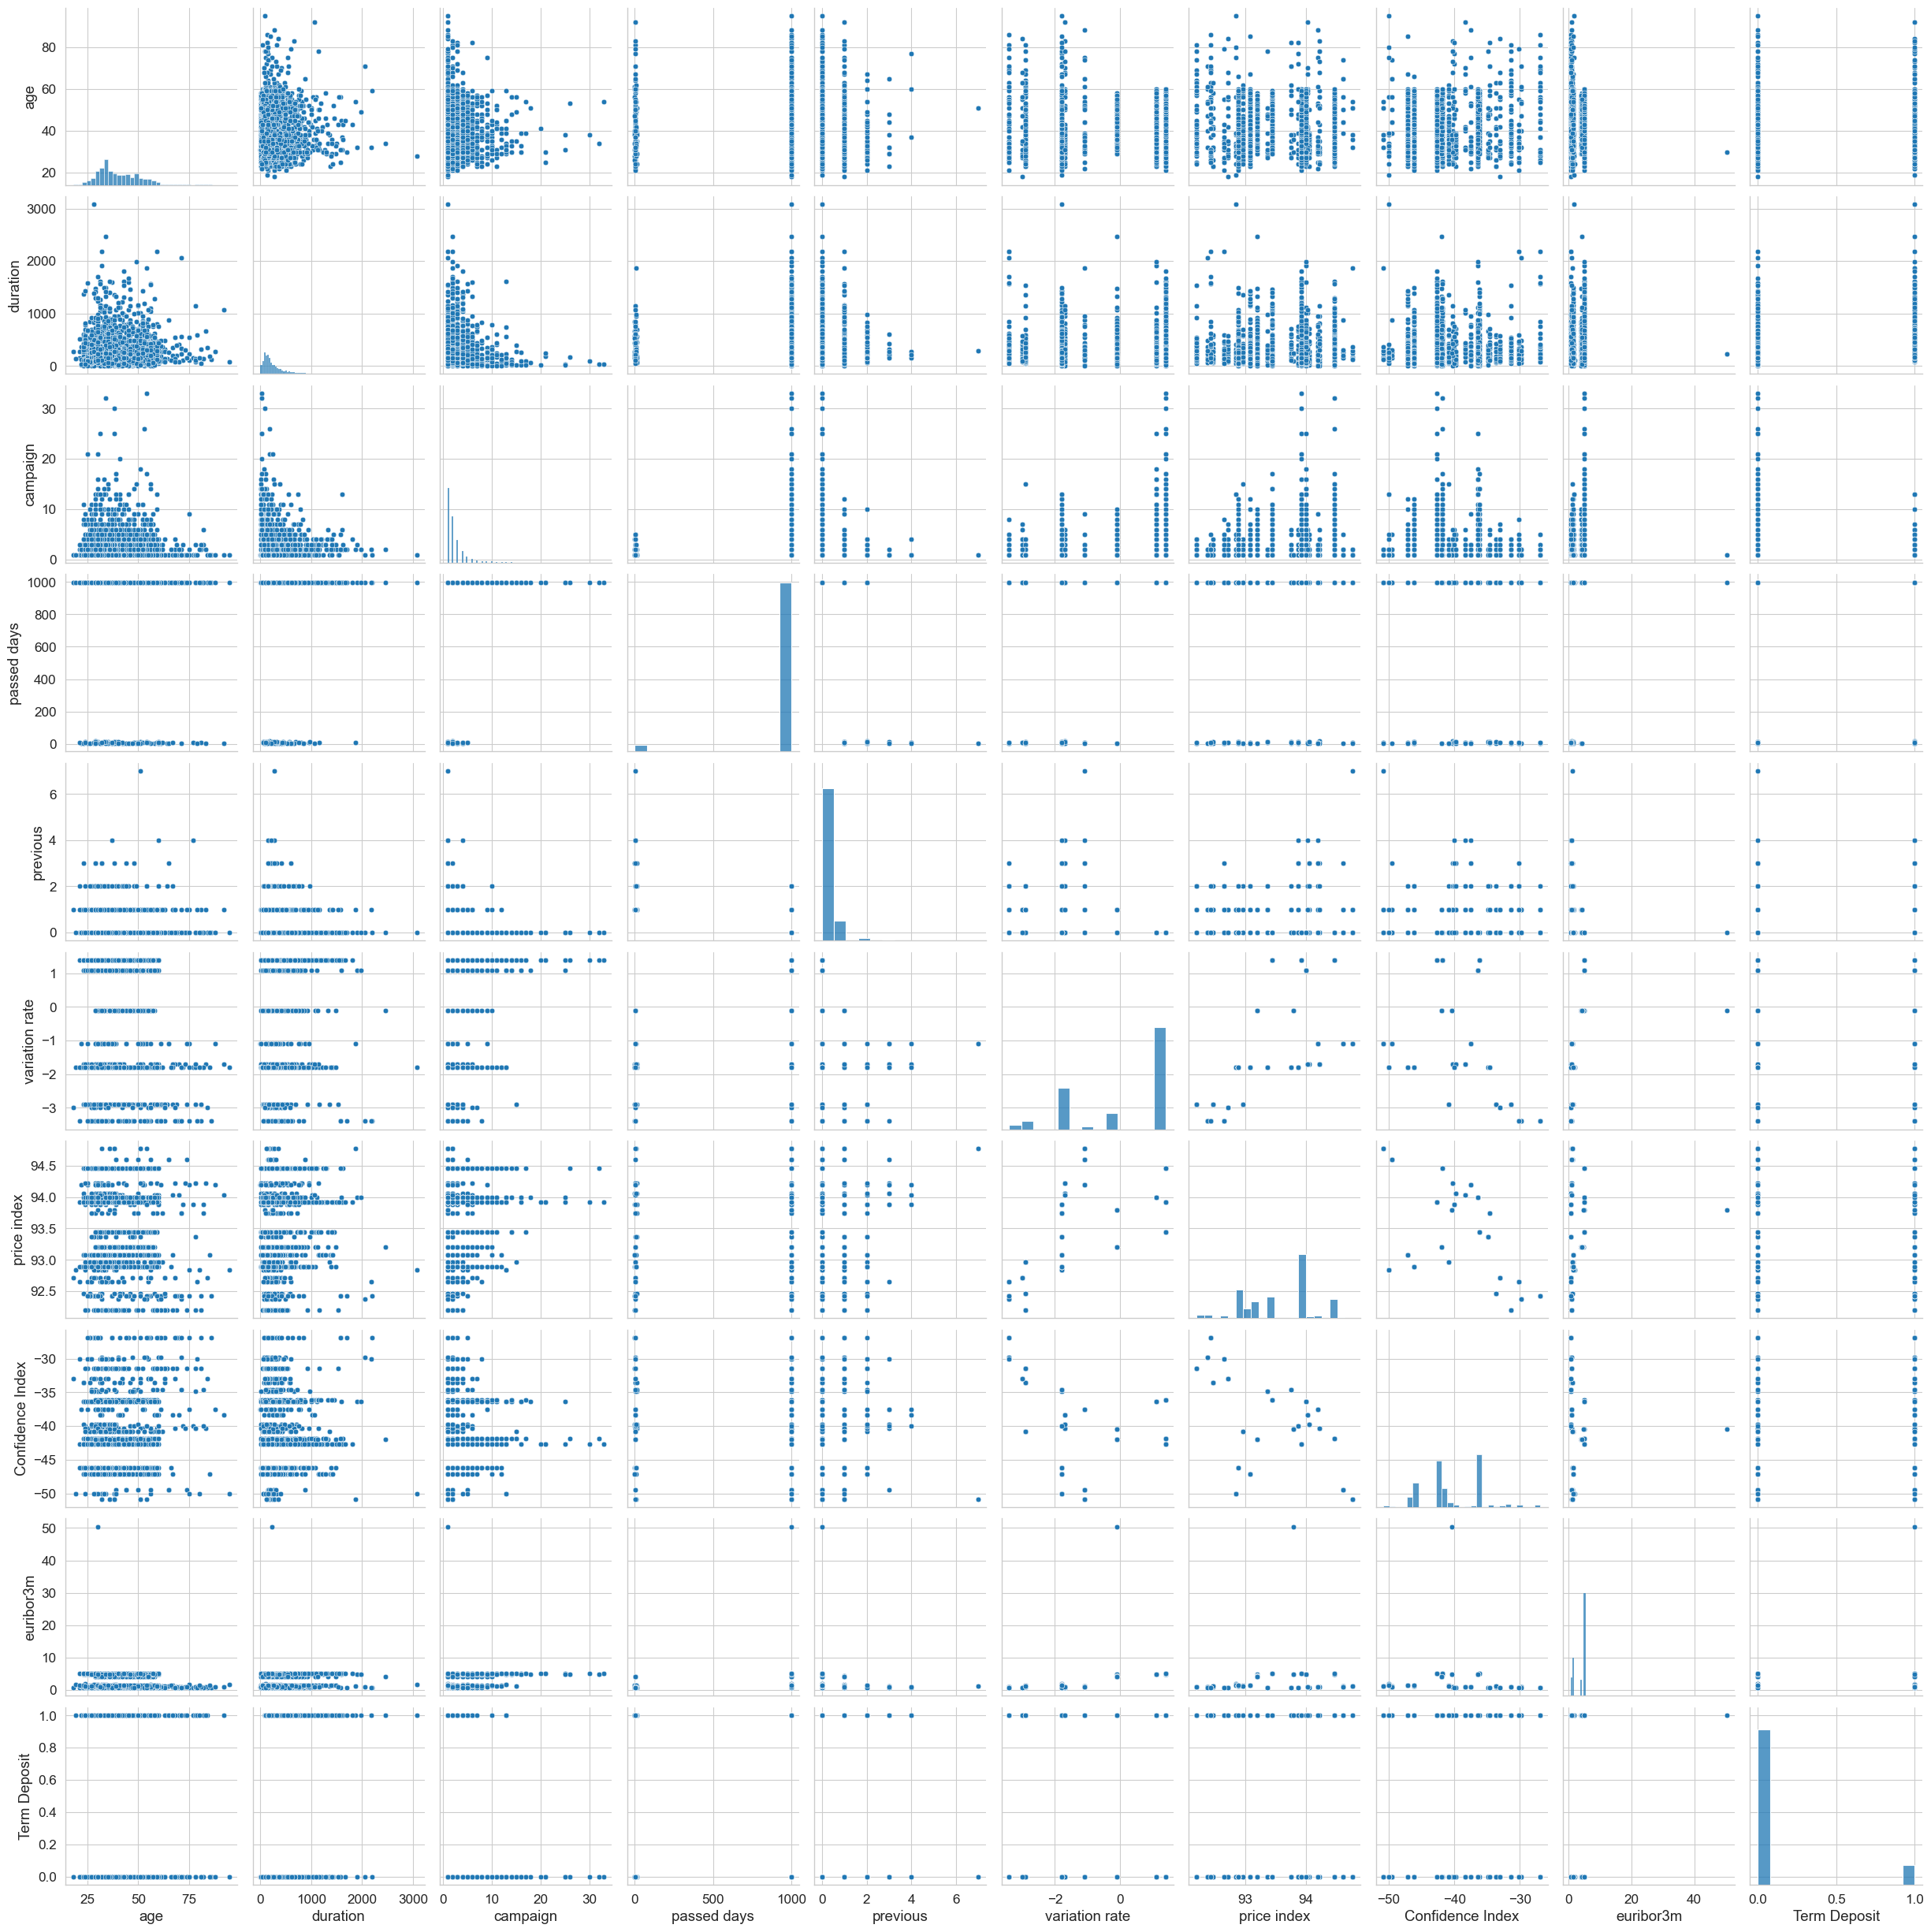

In [133]:
data = df.select_dtypes(include=['number'])
numeric_df = data.drop(['month', 'day_of_week'], axis=1)
sns.pairplot(numeric_df)

In [134]:
# pandas to get numeric values on feature correlation
import pandas as pd
import numpy as np

# select all columns which include number
numeric_columns = df.select_dtypes(include=[np.number]).columns
print("Numeric columns:", numeric_columns.tolist())

import_corr = df[numeric_columns].corr()
import_corr
# drop columns month and day_of_week as they are considered as categorical data because even though the values are in numeric form
filtered_corr = import_corr.drop(['month', 'day_of_week'], axis=0).drop(['month', 'day_of_week'], axis=1)
filtered_corr

Numeric columns: ['age', 'month', 'day_of_week', 'duration', 'campaign', 'passed days', 'previous', 'variation rate', 'price index', 'Confidence Index', 'euribor3m', 'Term Deposit']


,age,duration,campaign,passed days,previous,variation rate,price index,Confidence Index,euribor3m,Term Deposit
age,1.000000,0.008433,-0.019167,-0.064801,0.021161,-0.017740,0.010234,0.130224,-0.018515,0.024366
duration,0.008433,1.000000,-0.061892,-0.066491,0.053336,-0.043593,0.001627,0.033504,-0.041316,0.447301
campaign,-0.019167,-0.061892,1.000000,0.063451,-0.095249,0.142414,0.124827,-0.020823,0.107290,-0.067529
passed days,-0.064801,-0.066491,0.063451,1.000000,-0.605635,0.269904,0.096956,-0.094335,0.262394,-0.301573
previous,0.021161,0.053336,-0.095249,-0.605635,1.000000,-0.416179,-0.238229,-0.054098,-0.389509,0.231225
variation rate,-0.017740,-0.043593,0.142414,0.269904,-0.416179,1.000000,0.780782,0.166884,0.859000,-0.271072
price index,0.010234,0.001627,0.124827,0.096956,-0.238229,0.780782,1.000000,0.056963,0.615859,-0.123664
Confidence Index,0.130224,0.033504,-0.020823,-0.094335,-0.054098,0.166884,0.056963,1.000000,0.216925,0.055003
euribor3m,-0.018515,-0.041316,0.107290,0.262394,-0.389509,0.859000,0.615859,0.216925,1.000000,-0.222954
Term Deposit,0.024366,0.447301,-0.067529,-0.301573,0.231225,-0.271072,-0.123664,0.055003,-0.222954,1.000000


<Axes: >

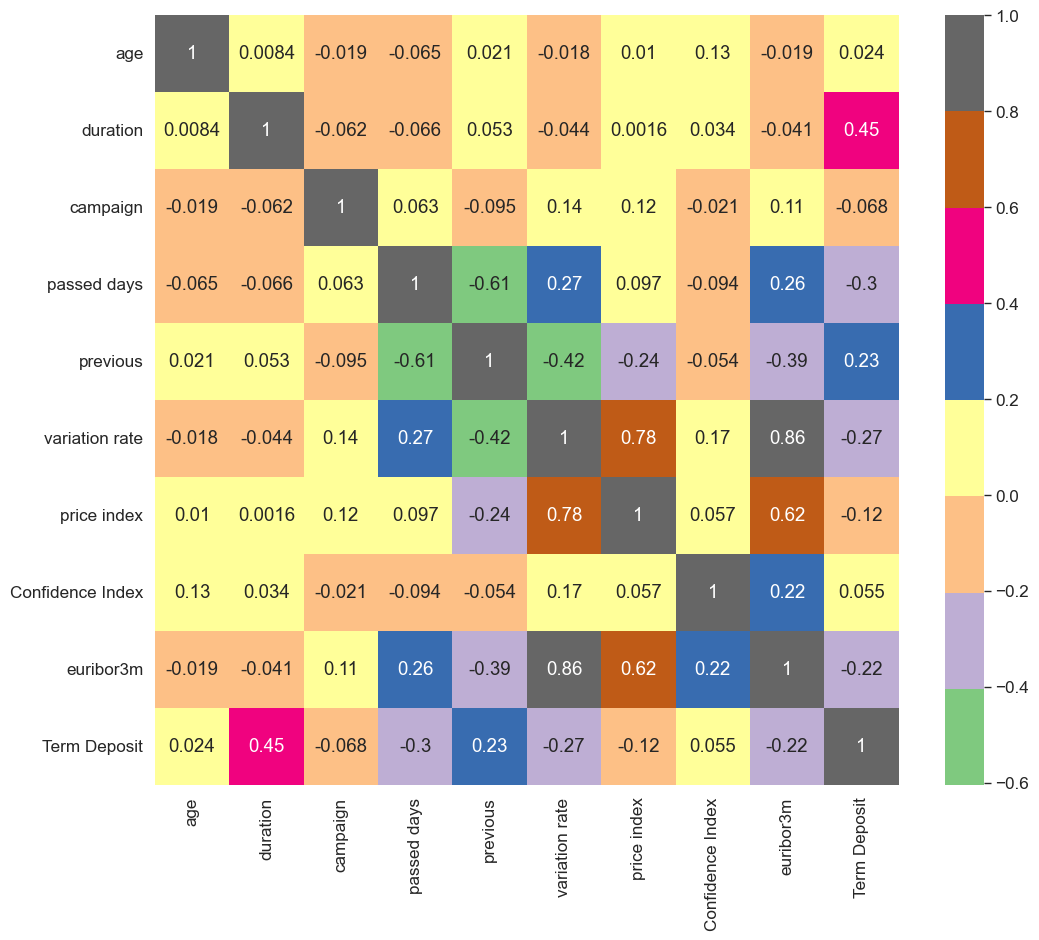

In [135]:
plt.figure(figsize=(12,10))
sns.set_context('paper', font_scale=1.4)

# create heatmap and add annotations and colour map
sns.heatmap(filtered_corr, annot=True, cmap='Accent')

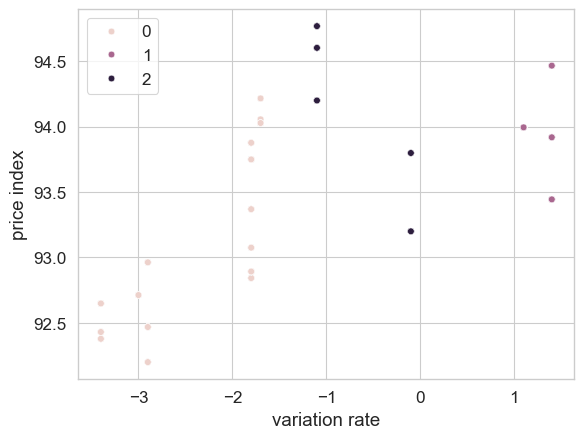

In [136]:
import sklearn.datasets
from sklearn.cluster import KMeans

# define attributes to cluster from the Data Frame
data_to_cluster = df[['variation rate', 'price index']]

# initialise KMeans clustering, set number of clusters to 3
clust = KMeans(n_clusters=3)

# train the model to learn about the patterns of the variables using .fit()
df['cluster_labels'] = clust.fit(data_to_cluster)

# plotting the scatter plot
sns.set_style("whitegrid") # have a white grid for readability
# generate scatter plot
# add the variables in the x and y axis, add colour to the clusters, specify the Data Frame 
sns.scatterplot(x='variation rate', y='price index', hue=clust.labels_, data=df) 

# display result
plt.show()

<Axes: xlabel='variation rate', ylabel='price index'>

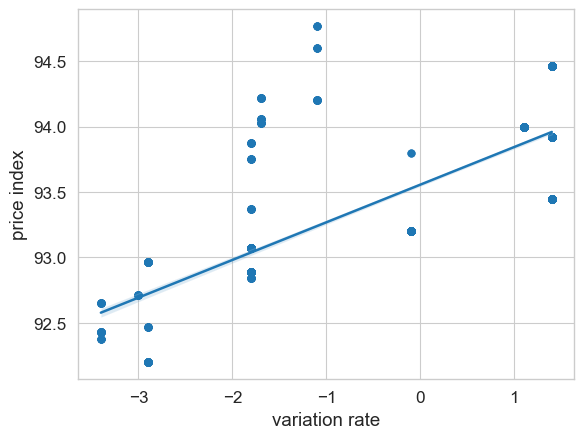

In [137]:
sns.regplot(x='variation rate', y='price index', data=df)